In [2]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import pandas as pd

In [4]:
#import dataset
data2019 = pd.read_csv("../podaci/atp_matches_2019.csv")
data2019.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0


In [5]:
data2019cleared = data2019[['tourney_id','tourney_name','surface','match_num','winner_id','loser_id','winner_rank','loser_rank']]

In [6]:
print(data2019cleared.dtypes)

tourney_id       object
tourney_name     object
surface          object
match_num         int64
winner_id         int64
loser_id          int64
winner_rank     float64
loser_rank      float64
dtype: object


In [7]:
print("Broj redova: ", data2019cleared.shape[0])
print("Broj kolona: ", data2019cleared.shape[1])

Broj redova:  2781
Broj kolona:  8


In [8]:
#empty field
data2019cleared.isna().any()

tourney_id      False
tourney_name    False
surface         False
match_num       False
winner_id       False
loser_id        False
winner_rank      True
loser_rank       True
dtype: bool

In [9]:
data2019cleared = data2019cleared.dropna()

In [10]:
#check if match number is unique
print(data2019cleared['match_num'].isnull().values.any())
print(data2019cleared['match_num'].is_unique)

False
False


In [11]:
#add column match_id as unique
data2019cleared['match_id'] = data2019cleared.index
data2019cleared.head()

,tourney_id,tourney_name,surface,match_num,winner_id,loser_id,winner_rank,loser_rank,match_id
0,2019-M020,Brisbane,Hard,300,105453,106421,9.0,16.0,0
1,2019-M020,Brisbane,Hard,299,106421,104542,16.0,239.0,1
2,2019-M020,Brisbane,Hard,298,105453,104871,9.0,40.0,2
3,2019-M020,Brisbane,Hard,297,104542,200282,239.0,31.0,3
4,2019-M020,Brisbane,Hard,296,106421,105683,16.0,18.0,4


In [12]:
data2019cleared.to_csv(r'../podaciExport/atp_matches_2019_cleared.csv')

In [13]:
dataPlayers = pd.read_csv("../podaci/atp_players.csv")
dataPlayers.head()

,100001,Gardnar,Mulloy,R,19131122,USA
0,100002,Pancho,Segura,R,19210620.0,ECU
1,100003,Frank,Sedgman,R,19271002.0,AUS
2,100004,Giuseppe,Merlo,R,19271011.0,ITA
3,100005,Richard Pancho,Gonzales,R,19280509.0,USA
4,100006,Grant,Golden,R,19290821.0,USA


In [14]:
dataPlayers.columns=['player_id','first_name','last_name','hand','birth_date','country_code']
dataPlayers.head()

,player_id,first_name,last_name,hand,birth_date,country_code
0,100002,Pancho,Segura,R,19210620.0,ECU
1,100003,Frank,Sedgman,R,19271002.0,AUS
2,100004,Giuseppe,Merlo,R,19271011.0,ITA
3,100005,Richard Pancho,Gonzales,R,19280509.0,USA
4,100006,Grant,Golden,R,19290821.0,USA


In [15]:
dataPlayerscleared = dataPlayers[['player_id','first_name','last_name','country_code']]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code
0,100002,Pancho,Segura,ECU
1,100003,Frank,Sedgman,AUS
2,100004,Giuseppe,Merlo,ITA
3,100005,Richard Pancho,Gonzales,USA
4,100006,Grant,Golden,USA


In [16]:
print(dataPlayerscleared.dtypes)

player_id        int64
first_name      object
last_name       object
country_code    object
dtype: object


In [17]:
print("Broj redova: ", dataPlayerscleared.shape[0])
print("Broj kolona: ", dataPlayerscleared.shape[1])

Broj redova:  54974
Broj kolona:  4


In [18]:
#is there any empty field
dataPlayerscleared.isna().any()

player_id       False
first_name       True
last_name        True
country_code     True
dtype: bool

In [19]:
dataPlayerscleared=dataPlayerscleared.dropna()
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code
0,100002,Pancho,Segura,ECU
1,100003,Frank,Sedgman,AUS
2,100004,Giuseppe,Merlo,ITA
3,100005,Richard Pancho,Gonzales,USA
4,100006,Grant,Golden,USA


In [20]:
print(dataPlayerscleared['player_id'].is_unique)

True


In [21]:
#add new column winner with full name
dataPlayerscleared["full_name"] = dataPlayerscleared["first_name"] + " " + dataPlayerscleared["last_name"]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name
0,100002,Pancho,Segura,ECU,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden


In [22]:
dataPlayerscleared.to_csv(r'../podaciExport/atp_players_cleared.csv')

In [23]:
import pyodbc 
cstr = "DRIVER={Microsoft Access Text Driver (*.txt, *.csv)};Extensions=csv;Dbq=C:\\Users\\brank_000\\Desktop\\ASM\\Projekat\\python\\podaciExport"
connection = pyodbc.connect(cstr, autocommit=True)
cursor = connection.cursor()

query = " SELECT M.winner_id, P.full_name, COUNT(*) FROM atp_matches_2019_cleared.csv M left join atp_players_cleared.csv P on P.player_id = M.winner_id GROUP BY M.winner_id, P.full_name ORDER BY 3 DESC"

cursor.execute(query)

row = cursor.fetchone() 
while row: 

    print(row)
    #print(row[1])
    row = cursor.fetchone()
    

cursor.close()
connection.close()

(104745, 'Rafael Nadal', 59)
(106421, 'Daniil Medvedev', 59)
(104925, 'Novak Djokovic', 58)
(126774, 'Stefanos Tsitsipas', 54)
(103819, 'Roger Federer', 53)
(106233, 'Dominic Thiem', 49)
(126610, 'Matteo Berrettini', 43)
(100644, 'Alexander Zverev', 42)
(105138, 'Roberto Bautista Agut', 41)
(106043, 'Diego Sebastian Schwartzman', 40)
(133430, 'Denis Shapovalov', 39)
(200282, 'Alex De Minaur', 38)
(126094, 'Andrey Rublev', 38)
(105676, 'David Goffin', 37)
(104792, 'Gael Monfils', 37)
(105526, 'Jan Lennard Struff', 35)
(105550, 'Guido Pella', 35)
(105332, 'Benoit Paire', 34)
(200000, 'Felix Auger Aliassime', 34)
(104527, 'Stanislas Wawrinka', 33)
(106426, 'Christian Garin', 32)
(104542, 'Jo Wilfried Tsonga', 32)
(104926, 'Fabio Fognini', 31)
(105430, 'Radu Albot', 31)
(105936, 'Filip Krajinovic', 31)
(126203, 'Taylor Harry Fritz', 31)
(105077, 'Albert Ramos', 30)
(105807, 'Pablo Carreno Busta', 30)
(111575, 'Karen Khachanov', 29)
(104545, 'John Isner', 29)
(105453, 'Kei Nishikori', 29)
(

In [24]:
import pyodbc 
cstr = "DRIVER={Microsoft Access Text Driver (*.txt, *.csv)};Extensions=csv;Dbq=C:\\Users\\brank_000\\Desktop\\ASM\\Projekat\\python\\podaciExport"
connection = pyodbc.connect(cstr, autocommit=True)
cursor = connection.cursor()

query = " SELECT M.loser_id, P.full_name, COUNT(*) FROM atp_matches_2019_cleared.csv M left join atp_players_cleared.csv P on P.player_id = M.loser_id GROUP BY M.loser_id, P.full_name ORDER BY 3 DESC"

cursor.execute(query)

row = cursor.fetchone() 
while row: 

    print(row)
    #print(row[1])
    row = cursor.fetchone()
    

cursor.close()
connection.close()

(105311, 'Joao Sousa', 31)
(111575, 'Karen Khachanov', 29)
(105526, 'Jan Lennard Struff', 29)
(105332, 'Benoit Paire', 29)
(126203, 'Taylor Harry Fritz', 29)
(104468, 'Gilles Simon', 28)
(105357, 'John Millman', 28)
(104269, 'Fernando Verdasco', 27)
(104871, 'Jeremy Chardy', 27)
(133430, 'Denis Shapovalov', 27)
(105676, 'David Goffin', 27)
(105583, 'Dusan Lajovic', 27)
(106043, 'Diego Sebastian Schwartzman', 26)
(105550, 'Guido Pella', 26)
(105430, 'Radu Albot', 26)
(105916, 'Marton Fucsovics', 26)
(105173, 'Adrian Mannarino', 26)
(105062, 'Mikhail Kukushkin', 26)
(126207, 'Francis Tiafoe', 25)
(111815, 'Cameron Norrie', 25)
(126610, 'Matteo Berrettini', 25)
(126774, 'Stefanos Tsitsipas', 25)
(106065, 'Marco Cecchinato', 25)
(128034, 'Hubert Hurkacz', 24)
(106426, 'Christian Garin', 24)
(100644, 'Alexander Zverev', 24)
(105732, 'Pierre Hugues Herbert', 24)
(104312, 'Andreas Seppi', 24)
(105077, 'Albert Ramos', 24)
(105932, 'Nikoloz Basilashvili', 24)
(106432, 'Borna Coric', 23)
(200000

In [25]:
#add new column winner with full name
dataPlayerscleared["winner_full_name"] = dataPlayerscleared["first_name"] + " " + dataPlayerscleared["last_name"]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden


In [26]:
#add new column winner with full name
dataPlayerscleared["loser_full_name"] = dataPlayerscleared["first_name"] + " " + dataPlayerscleared["last_name"]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name,loser_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden,Grant Golden


In [27]:
data_short2019=data2019cleared[['match_num','winner_id','loser_id','match_id']]
data_short2019.head()

,match_num,winner_id,loser_id,match_id
0,300,105453,106421,0
1,299,106421,104542,1
2,298,105453,104871,2
3,297,104542,200282,3
4,296,106421,105683,4


In [28]:
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name,loser_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden,Grant Golden


In [29]:
dataPlayers_short_winner = dataPlayerscleared[['player_id','winner_full_name']]
dataPlayers_short_winner.head()

,player_id,winner_full_name
0,100002,Pancho Segura
1,100003,Frank Sedgman
2,100004,Giuseppe Merlo
3,100005,Richard Pancho Gonzales
4,100006,Grant Golden


In [30]:
dataPlayers_short_loser=dataPlayerscleared[['player_id','loser_full_name']]
dataPlayers_short_loser.head()

,player_id,loser_full_name
0,100002,Pancho Segura
1,100003,Frank Sedgman
2,100004,Giuseppe Merlo
3,100005,Richard Pancho Gonzales
4,100006,Grant Golden


In [31]:
#merge three tables
merged_data=data_short2019.merge(dataPlayers_short_winner,left_on='winner_id', right_on='player_id').drop('player_id', axis=1).merge(dataPlayers_short_loser,left_on='loser_id', right_on='player_id').drop('player_id', axis=1)
merged_data.head()

,match_num,winner_id,loser_id,match_id,winner_full_name,loser_full_name
0,300,105453,106421,0,Kei Nishikori,Daniil Medvedev
1,281,104871,106421,2566,Jeremy Chardy,Daniil Medvedev
2,265,106401,106421,1130,Nick Kyrgios,Daniil Medvedev
3,300,106401,106421,1848,Nick Kyrgios,Daniil Medvedev
4,212,104925,106421,152,Novak Djokovic,Daniil Medvedev


In [32]:
player_asm = merged_data[['winner_id','loser_id','match_id','winner_full_name','loser_full_name']]
player_asm.head()

,winner_id,loser_id,match_id,winner_full_name,loser_full_name
0,105453,106421,0,Kei Nishikori,Daniil Medvedev
1,104871,106421,2566,Jeremy Chardy,Daniil Medvedev
2,106401,106421,1130,Nick Kyrgios,Daniil Medvedev
3,106401,106421,1848,Nick Kyrgios,Daniil Medvedev
4,104925,106421,152,Novak Djokovic,Daniil Medvedev


In [33]:
#id player unique
list_winner = set(player_asm['winner_full_name'].unique())
list_loser = set(player_asm['loser_full_name'].unique())

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 320 različitih igrača


In [34]:
import numpy as np
import matplotlib.pyplot as plt

data_reduced = player_asm[['winner_full_name','loser_full_name','match_id']]

In [35]:
import networkx as nx
G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

In [36]:
#agregacija brojanjem
for _, winner_full_name, loser_full_name, _ in data_reduced.itertuples():
    if (winner_full_name, loser_full_name) in G.edges:
        G.edges[winner_full_name, loser_full_name]['weight'] += 1
    else:
        G.add_edge(winner_full_name, loser_full_name, weight=1)

In [37]:
print(G.edges.data("weight"))

#nx.draw_networkx(G)#-> crta mrežu, ne pokušavati za mrežu sa ovoliko čvorova i grana!

[('George Tsivadze', 'Casper Ruud', 1), ('Raymond Sarmiento', 'Jeremy Chardy', 1), ('Thai Son Kwiatkowski', 'Nick Kyrgios', 1), ('Yan Bai', 'Daniel Evans', 1), ('Yan Bai', 'Soon Woo Kwon', 1), ('Jeremy Chardy', 'Daniil Medvedev', 2), ('Jeremy Chardy', 'Kei Nishikori', 1), ('Jeremy Chardy', 'Jo Wilfried Tsonga', 1), ('Jeremy Chardy', 'Novak Djokovic', 1), ('Jeremy Chardy', 'Nikoloz Basilashvili', 1), ('Jeremy Chardy', 'Stanislas Wawrinka', 1), ('Jeremy Chardy', 'Pierre Hugues Herbert', 1), ('Jeremy Chardy', 'Nicolas Jarry', 3), ('Jeremy Chardy', 'Cameron Norrie', 1), ('Jeremy Chardy', 'Matteo Berrettini', 1), ('Jeremy Chardy', 'Andreas Seppi', 1), ('Jeremy Chardy', 'Stefanos Tsitsipas', 1), ('Jeremy Chardy', 'Francis Tiafoe', 1), ('Jeremy Chardy', 'Rafael Nadal', 1), ('Jeremy Chardy', 'Marin Cilic', 1), ('Jeremy Chardy', 'Alexander Zverev', 2), ('Jeremy Chardy', 'Karen Khachanov', 1), ('Jeremy Chardy', 'Borna Coric', 1), ('Jeremy Chardy', 'David Goffin', 1), ('Jeremy Chardy', 'Albert Ra

In [38]:
output = "models/undirected_count_aggregation2019.gml"

nx.write_gml(G, output)

In [39]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 320
Number of edges: 2334
Average degree:  14.5875


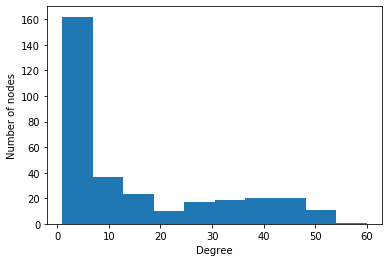

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    
    plt.show()

plot_degree_dist(G)

Text(0, 0.5, 'Frequency of nodes')

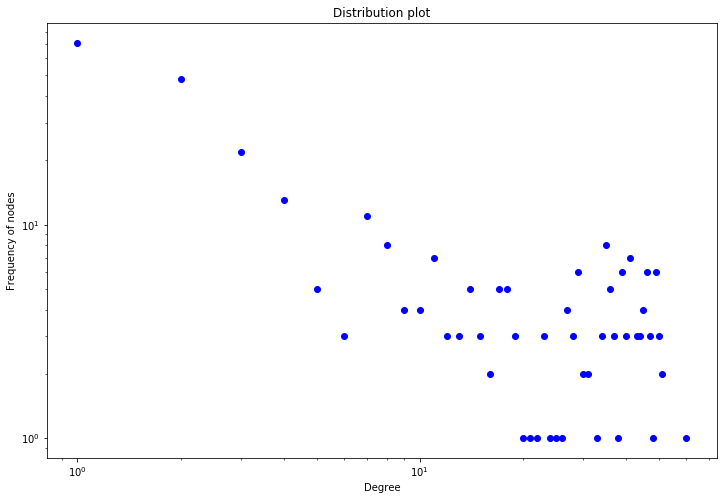

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'bo') 
plt.title("Distribution plot")
plt.xlabel('Degree')
plt.ylabel('Frequency of nodes')
#plt.savefig('./output/G_degree_distributionLog.pdf')

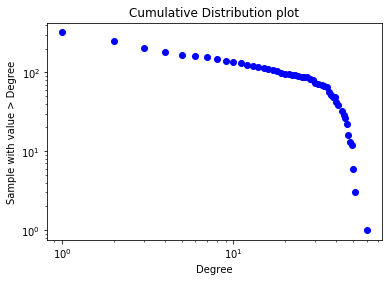

In [42]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, 'bo')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()

Čvorovi ego mreže igrača Novak Djokovic su ['Stefanos Tsitsipas', 'Roger Federer', 'Marin Cilic', 'Benoit Paire', 'Lucas Pouille', 'Kei Nishikori', 'Alexander Zverev', 'Karen Khachanov', 'Daniil Medvedev', 'Jeremy Chardy', 'Denis Kudla', 'Denis Shapovalov', 'Rafael Nadal', 'Mitchell Krueger', 'Matteo Berrettini', 'Juan Martin Del Potro', 'Kyle Edmund', 'Nikoloz Basilashvili', 'Damir Dzumhur', 'John Millman', 'Salvatore Caruso', 'Stanislas Wawrinka', 'Alexei Popyrin', 'Dominic Thiem', 'Philipp Kohlschreiber', 'Juan Ignacio Londero', 'Grigor Dimitrov', 'Yoshihito Nishioka', 'Diego Sebastian Schwartzman', 'Sam Querrey', 'Novak Djokovic', 'Go Soeda', 'Roberto Carballes Baena', 'Bjorn Fratangelo', 'Henri Laaksonen', 'Jo Wilfried Tsonga', 'Pablo Carreno Busta', 'Taylor Harry Fritz', 'Bernard Tomic', 'Marton Fucsovics', 'Federico Delbonis', 'David Goffin', 'John Isner', 'Jan Lennard Struff', 'Hubert Hurkacz', 'Ugo Humbert', 'Corentin Moutet', 'Roberto Bautista Agut']


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{('Stefanos Tsitsipas',
  'Daniil Medvedev'): Text(0.7499999801421193, 0.4330127185251042, '3'),
 ('Stefanos Tsitsipas',
  'Jeremy Chardy'): Text(0.6913417083350938, 0.46193974659531556, '1'),
 ('Stefanos Tsitsipas',
  'Marton Fucsovics'): Text(0.6913417977420606, -0.4619397243262484, '1'),
 ('Stefanos Tsitsipas',
  'Benoit Paire'): Text(0.9619397463468805, 0.19134172348469, '1'),
 ('Stefanos Tsitsipas',
  'Taylor Harry Fritz'): Text(0.565263200015677, -0.4957224149624751, '1'),
 ('Stefanos Tsitsipas',
  'Jan Lennard Struff'): Text(0.8966766838771718, -0.3043806877111575, '3'),
 ('Stefanos Tsitsipas',
  'David Goffin'): Text(0.8043807693364342, -0.3966766320542174, '2'),
 ('Stefanos Tsitsipas',
  'Novak Djokovic'): Text(0.14644658297185387, -0.35355335717506653, '3'),
 ('Stefanos Tsitsipas',
  'Stanislas Wawrinka'): Text(0.03806024562299426, 0.19134173838585114, '1'),
 ('Stefanos Tsitsipas',
  'Rafael Nadal'): Text(0.4999999741292433, 0.4999999943500586, '4'),
 ('Stefanos Tsitsipas',
 

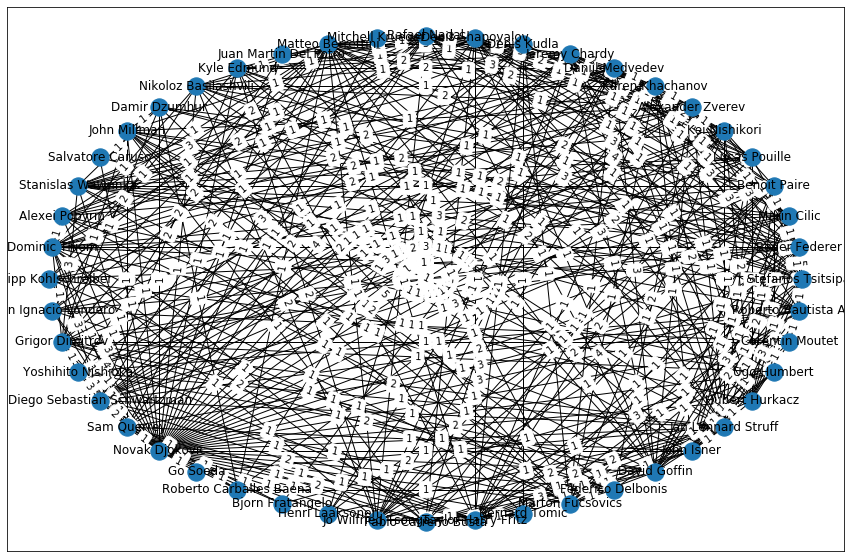

In [43]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Novak Djokovic')
print(f"Čvorovi ego mreže igrača Novak Djokovic su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [44]:
from collections import Counter
from operator import itemgetter
def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)     
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 71, 2: 48, 3: 22, 4: 13, 7: 11, 35: 8, 8: 8, 11: 7, 41: 7, 39: 6, 46: 6, 29: 6, 49: 6, 17: 5, 36: 5, 18: 5, 14: 5, 5: 5, 9: 4, 10: 4, 45: 4, 27: 4, 43: 3, 37: 3, 40: 3, 15: 3, 23: 3, 50: 3, 6: 3, 13: 3, 28: 3, 19: 3, 34: 3, 44: 3, 12: 3, 47: 3, 31: 2, 51: 2, 30: 2, 16: 2, 21: 1, 25: 1, 33: 1, 24: 1, 38: 1, 20: 1, 60: 1, 48: 1, 22: 1, 26: 1})


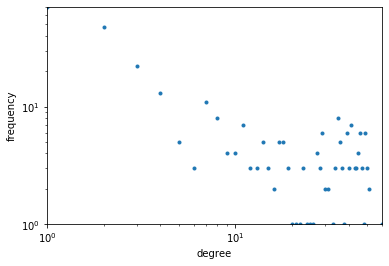

In [45]:
 plot_deg_frequency(G)

Counter({1: 70, 2: 49, 3: 22, 4: 13, 7: 10, 8: 9, 43: 6, 57: 5, 15: 5, 10: 5, 20: 5, 16: 5, 5: 5, 46: 4, 30: 4, 12: 4, 49: 4, 64: 4, 42: 4, 39: 4, 52: 3, 18: 3, 22: 3, 9: 3, 66: 3, 6: 3, 35: 3, 48: 3, 11: 3, 14: 3, 13: 3, 40: 3, 55: 2, 17: 2, 33: 2, 38: 2, 53: 2, 68: 2, 23: 2, 36: 2, 50: 2, 21: 2, 58: 2, 34: 2, 28: 2, 54: 2, 31: 2, 41: 1, 27: 1, 61: 1, 63: 1, 19: 1, 25: 1, 51: 1, 60: 1, 37: 1, 56: 1, 47: 1, 79: 1, 32: 1, 80: 1, 67: 1, 69: 1, 29: 1})


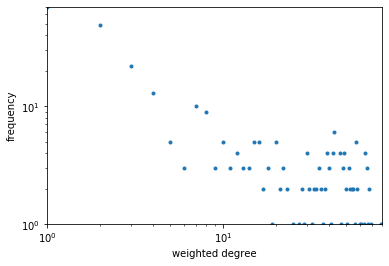

In [46]:
plot_deg_frequency(G, weighted = True)

Counter({16: 35, 15: 32, 14: 31, 17: 28, 11: 28, 12: 27, 13: 26, 10: 17, 18: 17, 9: 16, 20: 15, 19: 13, 22: 10, 21: 5, 8: 5, 6: 4, 24: 3, 7: 3, 23: 3, 26: 1, 4: 1})


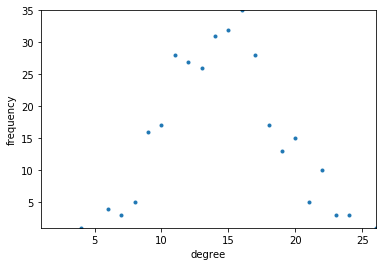

Counter({16: 35, 15: 32, 14: 31, 17: 28, 11: 28, 12: 27, 13: 26, 10: 17, 18: 17, 9: 16, 20: 15, 19: 13, 22: 10, 21: 5, 8: 5, 6: 4, 24: 3, 7: 3, 23: 3, 26: 1, 4: 1})


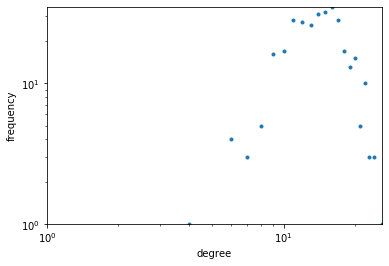

In [47]:
#slucajno generisana mreza Gnm ima normalnu distribuciju!
n = G.number_of_nodes()
m = G.number_of_edges()
Gnm = nx.gnm_random_graph(n, m) 

plot_deg_frequency(Gnm, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(Gnm, xscale = 'log', yscale = 'log')

0.04572884012539185
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 57, što je odstupanje od 2.442159383033419%
Counter({15: 41, 13: 37, 12: 37, 16: 33, 17: 27, 14: 25, 11: 19, 18: 18, 10: 18, 19: 16, 21: 10, 8: 7, 9: 7, 20: 7, 7: 5, 6: 4, 22: 3, 5: 3, 24: 1, 4: 1, 23: 1})


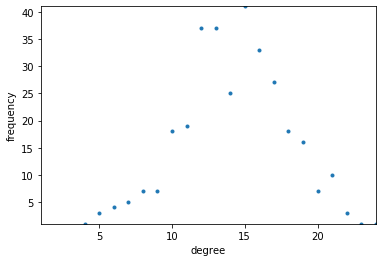

Counter({15: 41, 13: 37, 12: 37, 16: 33, 17: 27, 14: 25, 11: 19, 18: 18, 10: 18, 19: 16, 21: 10, 8: 7, 9: 7, 20: 7, 7: 5, 6: 4, 22: 3, 5: 3, 24: 1, 4: 1, 23: 1})


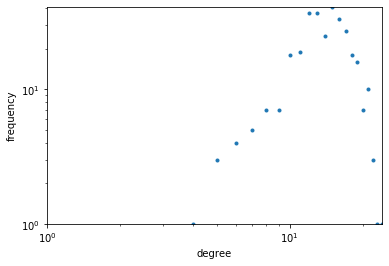

In [48]:
#Kako bi se ponašala Erdos-Renyi mreža sa koja ima isti broj čvorova n, a verovatnoća formiranja grane je takva da je očekivani broj grana u mreži m?
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

plot_deg_frequency(er_mreza, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(er_mreza, xscale = 'log', yscale = 'log')
#Šta nam informacije o raspodeli stepena čvora govore o ovoj mreži?

# Da je mreža bila sa slučajnim vezivanjem, očekivali bismo da raspodela bude slična normalnoj raspodeli! Sto i lici!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [49]:
#Asortativnost (eng. assortativity) meri stepen tendencije čvorova mreže da se vezuju sa sličnim čvorovima. 
#U ovoj analizi ćemo prvo sprovesti analizu asortativnosti na osnovu stepena čvora, jer nas interesuje da li se međusobno vezuju čvorovi koji su sličnog stepena, 
#ili habovi (čvorovi velikog stepena) teže da se slabo međusobno vezuju, a mnogo vezuju sa čvorovima malog stepena.
#Uvodi se koeficijent asortativnosti r, koji je u opsegu od -1 do 1. 
#Mreža sa r = 1 iskazuje savršeno asortativno mešanje (perfect assortative mixing pattern), kad je r = 0 mreža je neasortativna ili neutralna, dok je u slučaju r = −1 mreža potpuno disasortativna.
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.15380183837348774
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.15768659143814032


In [50]:
#Kao što vidimo, mreža je neutralna tj. neasortativna, odnosno, čvorovi sličnog stepena uglavnom se ne vezuju međusobno.

In [51]:
#ANALIZA KOMUNA
#Stepen klasterisanja može se proceniti na osnovu koeficijenta klasterisanja.
id_igraca, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(id_igraca, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

Max lokalni cc: 0.2519842099789747
Prosečan cc: 0.157999111585029
Lokalni stepeni klasterisanja koji nisu nula:
                    id        cc
185         Elias Ymer  0.007143
24       Zhizhen Zhang  0.013333
129  Sergiy Stakhovsky  0.014545
132         Jason Jung  0.016142
36         Mikael Ymer  0.019743
..                 ...       ...
136           Go Soeda  0.200000
16          Kevin King  0.200000
170        Sumit Nagal  0.200000
35        Dustin Brown  0.217328
141        Julian Lenz  0.251984

[190 rows x 2 columns]


Čvorovi ego mreže igrača Julian Lenz su ['Pablo Carreno Busta', 'Julian Lenz', 'Fabio Fognini']


{('Pablo Carreno Busta',
  'Fabio Fognini'): Text(0.2500000372529033, -0.43301270835610933, '2'),
 ('Pablo Carreno Busta',
  'Julian Lenz'): Text(0.24999996274709668, 0.43301271829021687, '1'),
 ('Julian Lenz', 'Fabio Fognini'): Text(-0.5, -9.934107536579972e-09, '1')}

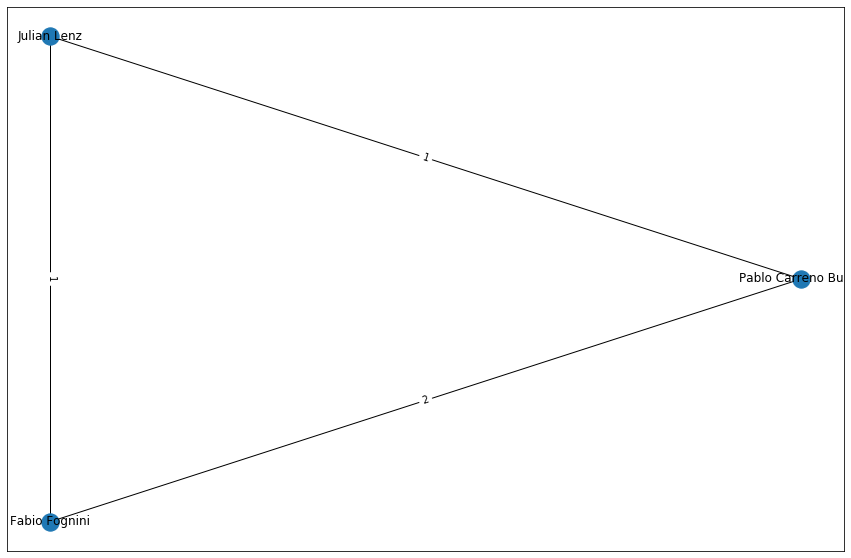

In [52]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Julian Lenz')
print(f"Čvorovi ego mreže igrača Julian Lenz su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Čvorovi ego mreže igrača Dustin Brown su ['John Millman', 'Felix Auger Aliassime', 'Dustin Brown', 'Alexander Zverev']


{('John Millman',
  'Alexander Zverev'): Text(0.50000000298122, -0.49999996721645945, '1'),
 ('John Millman',
  'Felix Auger Aliassime'): Text(0.4999999751630862, 0.5000000109278468, '1'),
 ('John Millman',
  'Dustin Brown'): Text(7.946626690014114e-09, -2.1855693665697605e-08, '1'),
 ('Felix Auger Aliassime',
  'Alexander Zverev'): Text(-7.946626738379675e-09, 2.1855693699279755e-08, '2'),
 ('Felix Auger Aliassime',
  'Dustin Brown'): Text(-0.50000000298122, 0.4999999672164595, '1'),
 ('Dustin Brown',
  'Alexander Zverev'): Text(-0.49999997516308625, -0.5000000109278468, '1')}

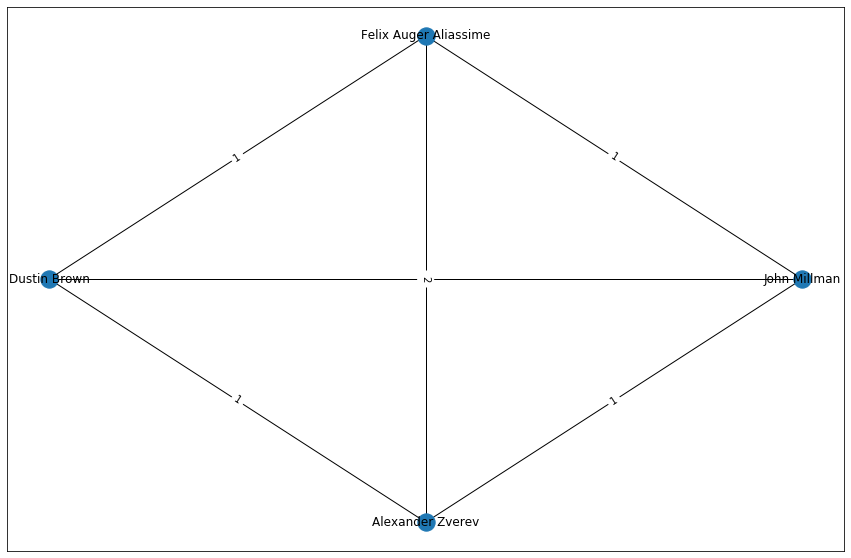

In [53]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Dustin Brown')
print(f"Čvorovi ego mreže igrača Dustin Brown su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Čvorovi ego mreže igrača Rafael Nadal su ['Stefanos Tsitsipas', 'Roger Federer', 'Tomas Berdych', 'Marin Cilic', 'Kei Nishikori', 'Alexander Zverev', 'Karen Khachanov', 'Daniil Medvedev', 'Jeremy Chardy', 'Jared Donaldson', 'Thanasi Kokkinakis', 'Rafael Nadal', 'Felix Auger Aliassime', 'Denis Shapovalov', 'Matteo Berrettini', 'Yannick Hanfmann', 'Yannick Maden', 'Nikoloz Basilashvili', 'John Millman', 'Daniel Evans', 'Stanislas Wawrinka', 'Dominic Thiem', 'Juan Ignacio Londero', 'Grigor Dimitrov', 'Diego Sebastian Schwartzman', 'Sam Querrey', 'Alex De Minaur', 'James Duckworth', 'Novak Djokovic', 'Fernando Verdasco', 'David Ferrer', 'Joao Sousa', 'Jo Wilfried Tsonga', 'Borna Gojo', 'Adrian Mannarino', 'Nick Kyrgios', 'Fabio Fognini', 'Guido Pella', 'Gael Monfils', 'David Goffin', 'Jan Lennard Struff', 'Mischa Zverev', 'Filip Krajinovic', 'Yuichi Sugita', 'Francis Tiafoe', 'Hyeon Chung', 'Leonardo Mayer', 'Matthew Ebden', 'Roberto Bautista Agut']


{('Stefanos Tsitsipas',
  'Daniil Medvedev'): Text(0.8117448969689927, 0.3909157646395455, '3'),
 ('Stefanos Tsitsipas',
  'Jeremy Chardy'): Text(0.7591962495986587, 0.4275713995905269, '1'),
 ('Stefanos Tsitsipas',
  'Adrian Mannarino'): Text(0.32731747059586697, -0.4692341924082408, '2'),
 ('Stefanos Tsitsipas',
  'Felix Auger Aliassime'): Text(0.5160258110748615, 0.4997431180817349, '3'),
 ('Stefanos Tsitsipas',
  'Jan Lennard Struff'): Text(0.702391651741512, -0.45720630281661084, '3'),
 ('Stefanos Tsitsipas',
  'David Goffin'): Text(0.6422638266891914, -0.47933390152743754, '2'),
 ('Stefanos Tsitsipas',
  'Gael Monfils'): Text(0.5798000136320233, -0.49359088564318876, '2'),
 ('Stefanos Tsitsipas',
  'Fernando Verdasco'): Text(0.08095591484786496, -0.272767417001875, '1'),
 ('Stefanos Tsitsipas',
  'Novak Djokovic'): Text(0.0495155671494521, -0.2169418701469098, '3'),
 ('Stefanos Tsitsipas',
  'Nick Kyrgios'): Text(0.3887394913111173, -0.4874639453410873, '1'),
 ('Stefanos Tsitsipa

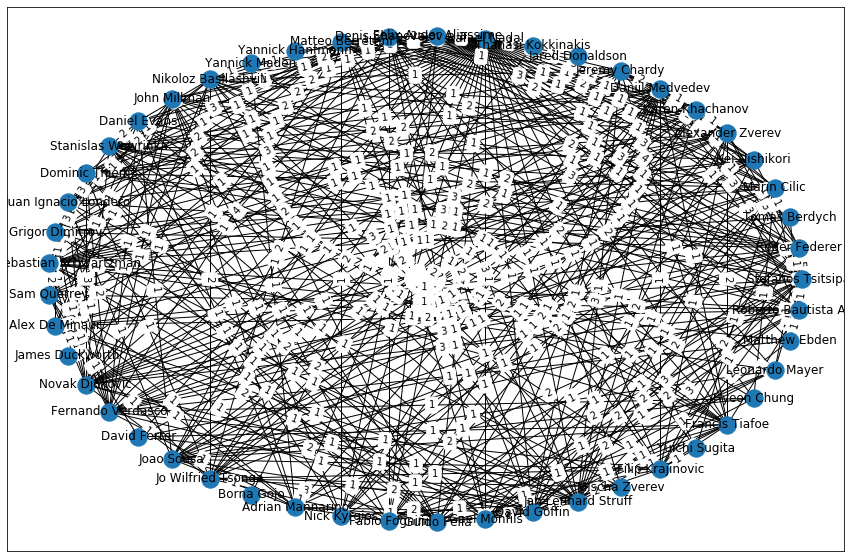

In [54]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Rafael Nadal')
print(f"Čvorovi ego mreže igrača Rafael Nadal su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Čvorovi ego mreže igrača Roger Federer su ['Roger Federer', 'Stefanos Tsitsipas', 'Lloyd George Muirhead Harris', 'Peter Gojowczyk', 'Radu Albot', 'Lucas Pouille', 'Kei Nishikori', 'Albert Ramos', 'Alexander Zverev', 'Kevin Anderson', 'Daniil Medvedev', 'Denis Shapovalov', 'Rafael Nadal', 'Pierre Hugues Herbert', 'Matteo Berrettini', 'Kyle Edmund', 'Damir Dzumhur', 'John Millman', 'Daniel Evans', 'Sumit Nagal', 'Stanislas Wawrinka', 'Dominic Thiem', 'Philipp Kohlschreiber', 'Denis Istomin', 'Juan Ignacio Londero', 'Grigor Dimitrov', 'Alex De Minaur', 'Novak Djokovic', 'Fernando Verdasco', 'Lorenzo Sonego', 'Richard Gasquet', 'Joao Sousa', 'Jo Wilfried Tsonga', 'Jay Clarke', 'Taylor Harry Fritz', 'Andrey Rublev', 'Marton Fucsovics', 'Gael Monfils', 'David Goffin', 'John Isner', 'Casper Ruud', 'Filip Krajinovic', 'Borna Coric', 'Hubert Hurkacz', 'Leonardo Mayer', 'Oscar Otte', 'Roberto Bautista Agut']


{('Roger Federer',
  'Daniil Medvedev'): Text(0.6159100891361174, 0.4863793274417099, '1'),
 ('Roger Federer',
  'Joao Sousa'): Text(0.23095875704170732, -0.42144608616235046, '1'),
 ('Roger Federer',
  'Marton Fucsovics'): Text(0.5500478504940671, -0.49748891737763884, '1'),
 ('Roger Federer',
  'Pierre Hugues Herbert'): Text(0.4168353357972609, 0.4930351397289384, '1'),
 ('Roger Federer',
  'Taylor Harry Fritz'): Text(0.41683524639029346, -0.49303510929252403, '1'),
 ('Roger Federer',
  'Jo Wilfried Tsonga'): Text(0.28953268870623905, -0.45354548226721325, '1'),
 ('Roger Federer',
  'David Goffin'): Text(0.6797039646406977, -0.46659028664838154, '3'),
 ('Roger Federer',
  'Lloyd George Muirhead Harris'): Text(0.9822345971427506, 0.1320977069869001, '1'),
 ('Roger Federer',
  'Gael Monfils'): Text(0.61590999972915, -0.48637935660994047, '1'),
 ('Roger Federer',
  'Fernando Verdasco'): Text(0.08777925046755802, -0.28297358820522495, '1'),
 ('Roger Federer',
  'Novak Djokovic'): Text(0.

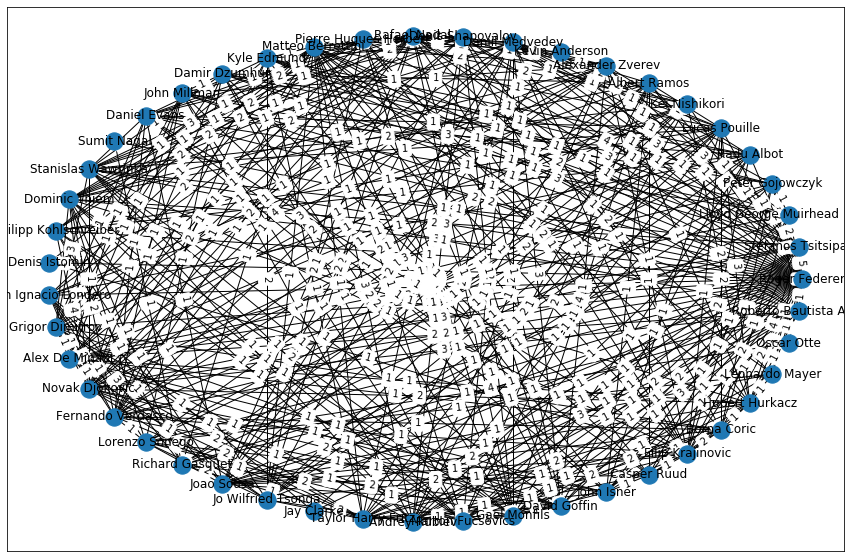

In [55]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Roger Federer')
print(f"Čvorovi ego mreže igrača Roger Federer su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [56]:
#CENTRALNOSTI
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G)

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df
df = calculate_centralities(G)
print(df)


                            DC        CC        BC       EVC
George Tsivadze       0.003135  0.305550  0.000000  0.002376
Raymond Sarmiento     0.003135  0.303464  0.000000  0.003533
Thai Son Kwiatkowski  0.003135  0.298799  0.000000  0.002669
Yan Bai               0.006270  0.309195  0.000027  0.003140
Jeremy Chardy         0.134796  0.437483  0.013779  0.120653
...                        ...       ...       ...       ...
Elias Ymer            0.025078  0.345996  0.002447  0.007798
Francis Tiafoe        0.122257  0.438099  0.008643  0.102781
Mirza Basic           0.015674  0.341438  0.005657  0.007625
Marcos Giron          0.018809  0.357118  0.000119  0.016071
Oscar Otte            0.012539  0.340317  0.000022  0.010061

[320 rows x 4 columns]


In [57]:
#Korelacija - kako jedna metrika zavisi od druge, pozitivna korelacija znači da veća vrednost jedne od metrikka povlači veću vrednost druge metrike. 
#Interesantno je posmatrati Kendalovu tau korelaciju (korelaciju po rangu, ne po numeričkoj vrednosti) između različitih mera centralnosti ove mreže.
import scipy.stats as stats
labele = ['DC', 'CC', 'BC', 'EVC']
cross_correlation_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])
p_val_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])
for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(df[ind], df[col])
print(cross_correlation_matrix)

           DC        CC        BC       EVC
DC          1  0.885429  0.776493  0.878664
CC   0.885429         1  0.686167  0.944355
BC   0.776493  0.686167         1  0.657219
EVC  0.878664  0.944355  0.657219         1


In [58]:
#BC-posmatra samo puteve, najslabije sa EVC

In [59]:
print(p_val_matrix)
#p treba da bude sto manji, kako ne bi bilo da se slucajno desilo

               DC            CC            BC           EVC
DC   3.51268e-136   9.6236e-115   6.41729e-85  2.88095e-113
CC    9.6236e-115  4.04245e-156    2.2408e-71  9.59267e-140
BC    6.41729e-85    2.2408e-71  5.11575e-143   9.00825e-66
EVC  2.88095e-113  9.59267e-140   9.00825e-66  8.69453e-157


In [60]:
df = calculate_centralities(G)

df_ = df
for metric in labele:
    df_[f"{metric}_rank"] = df[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank']

df_.sort_values(['composite_rank'], ascending = True)
df_.sort_values(['CC'], ascending = False, inplace=True)
print(df_)

                           DC        CC        BC           EVC  DC_rank  \
Daniil Medvedev      0.188088  0.472003  0.020214  1.619760e-01      1.0   
Stefanos Tsitsipas   0.159875  0.462872  0.016580  1.407951e-01      2.5   
Matteo Berrettini    0.156740  0.462184  0.010708  1.428771e-01      5.0   
Dusan Lajovic        0.137931  0.458776  0.032071  1.052817e-01     28.0   
Guido Pella          0.144201  0.458100  0.025177  1.157692e-01     19.5   
...                       ...       ...       ...           ...      ...   
Alibek Kachmazov     0.003135  0.191415  0.000000  3.010319e-06    285.0   
Rhett Purcell        0.003135  0.003135  0.000000  9.615180e-12    285.0   
Tung Lin Wu          0.003135  0.003135  0.000000  9.615180e-12    285.0   
David Agung Susanto  0.003135  0.003135  0.000000  9.615180e-12    285.0   
Pak Long Yeung       0.003135  0.003135  0.000000  9.615180e-12    285.0   

                     CC_rank  BC_rank  EVC_rank  composite_rank  
Daniil Medvedev      

In [61]:
#digraph sa usmerenom mrezom ka gubitniku
import networkx as nx
Gd = nx.DiGraph() # pravi praznu usmerenu mrežu
Gd.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

In [62]:
#agregacija brojanjem
for _, winner_full_name, loser_full_name, _ in data_reduced.itertuples():
    if (winner_full_name, loser_full_name) in Gd.edges:
        Gd.edges[winner_full_name, loser_full_name]['weight'] += 1
    else:
        Gd.add_edge(winner_full_name, loser_full_name, weight=1)

In [63]:
print(Gd.edges.data("weight"))

#nx.draw_networkx(G)#-> crta mrežu, ne pokušavati za mrežu sa ovoliko čvorova i grana!

[('Jeremy Chardy', 'Daniil Medvedev', 1), ('Jeremy Chardy', 'Pablo Carreno Busta', 2), ('Jeremy Chardy', 'Benoit Paire', 1), ('Jeremy Chardy', 'Jan Lennard Struff', 1), ('Jeremy Chardy', 'Mikhail Kukushkin', 1), ('Jeremy Chardy', 'Martin Klizan', 1), ('Jeremy Chardy', 'Nicolas Jarry', 2), ('Jeremy Chardy', 'Albert Ramos', 1), ('Jeremy Chardy', 'Diego Sebastian Schwartzman', 1), ('Jeremy Chardy', 'Christian Garin', 1), ('Jeremy Chardy', 'Kyle Edmund', 1), ('Jeremy Chardy', 'Gilles Simon', 1), ('Jeremy Chardy', 'Ugo Humbert', 1), ('Jeremy Chardy', 'Dusan Lajovic', 1), ('Jeremy Chardy', 'Yasutaka Uchiyama', 1), ('Jeremy Chardy', 'Nick Kyrgios', 1), ('Jeremy Chardy', 'Antonie Hoang', 1), ('Jeremy Chardy', 'Adrian Menendez Maceiras', 1), ('Jeremy Chardy', 'Richard Gasquet', 2), ('Jeremy Chardy', 'Marco Cecchinato', 2), ('Jeremy Chardy', 'Raymond Sarmiento', 1), ('Jeremy Chardy', 'Hubert Hurkacz', 1), ('Jeremy Chardy', 'Miomir Kecmanovic', 1), ('Jeremy Chardy', 'Sam Querrey', 1), ('Nikoloz B

In [64]:
output = "models/directed_count_aggregation2019.gml"

nx.write_gml(Gd, output)

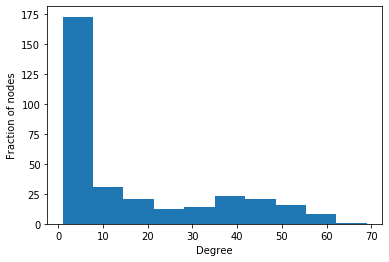

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [Gd.degree(n) for n in Gd.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    
    plt.show()

plot_degree_dist(Gd)
#plt.savefig('./output/G_degree_distributionHist.pdf')

Text(0, 0.5, 'Frequency')

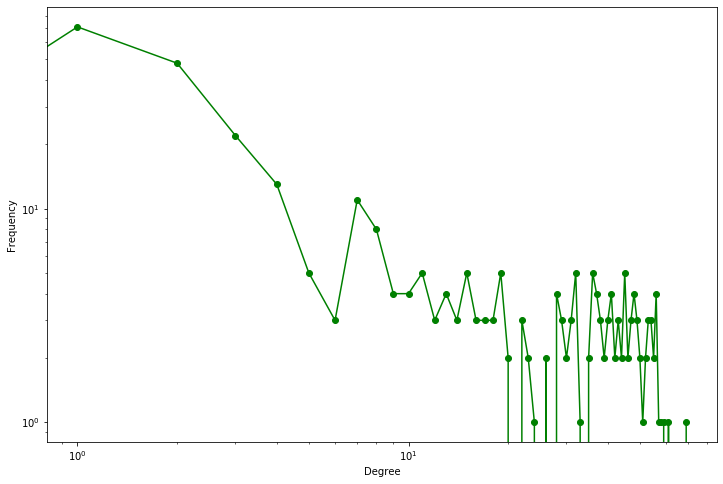

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

degree_freq = nx.degree_histogram(Gd)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
#plt.savefig('./output/Gd_degree_distributionLog.pdf')